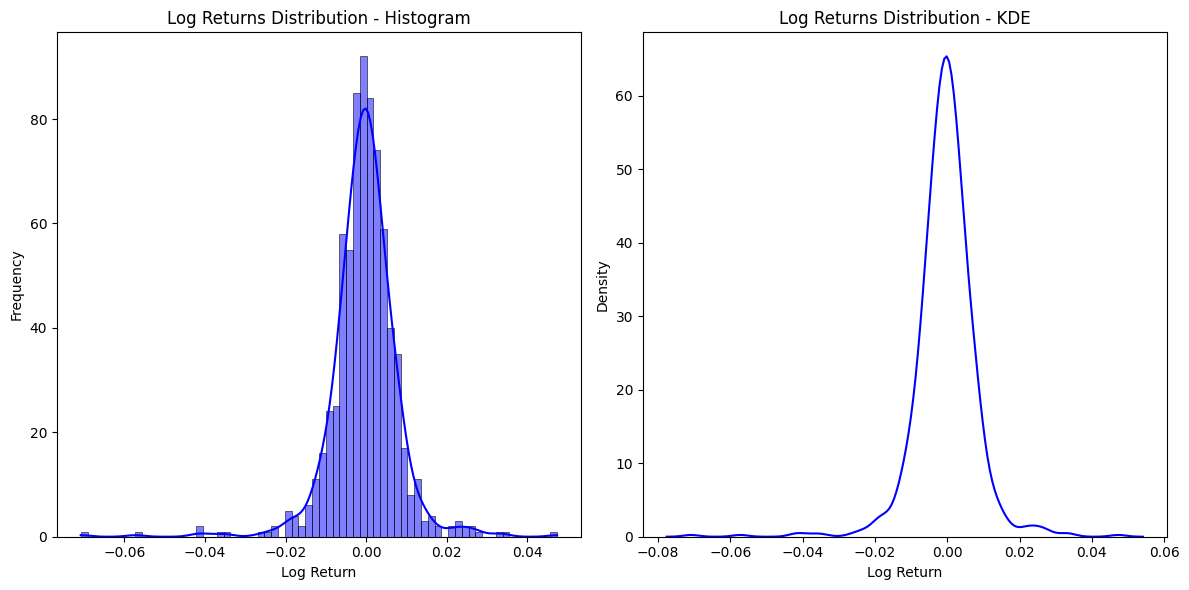

In [7]:
import pandas as pd

path = "/home/anton/repos/global_models_thesis/data/spot/monthly/klines/BTCUSDT/1h/BTCUSDT-1h-2022-12.csv"

df = pd.read_csv(path, names=["openTime","open","high","low","close","volume","closeTime","quoteAssetVolume","numberOfTrades","takerBuyBaseAssetVolume","takerBuyQuoteAssetVolume","ignore"])

close =pd.DataFrame(df["close"])

import numpy as np

close["logReturns"] = np.log(close/close.shift(1))
close=close.iloc[1:]

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(close['logReturns'], kde=True, color='blue')
plt.title('Log Returns Distribution - Histogram')
plt.xlabel('Log Return')
plt.ylabel('Frequency')

# KDE
plt.subplot(1, 2, 2)
sns.kdeplot(close['logReturns'], color='blue')
plt.title('Log Returns Distribution - KDE')
plt.xlabel('Log Return')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

In [8]:
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    result = adfuller(timeseries, autolag='AIC')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}, {value}')

# Perform ADF test on log returns
print("ADF Test for Log Returns:")
adf_test(close["logReturns"])

ADF Test for Log Returns:
ADF Statistic: -20.76803250319595
p-value: 0.0
Critical Values:
   1%, -3.4392057325732104
   5%, -2.8654483492874236
   10%, -2.5688512291811225
